In [1]:
import pandas as pd
import numpy as np

missing_values = ["n/a", "na", "--", "nan"]
data = pd.read_csv("./train.csv", na_values = missing_values)
#print(data.head())

/Users/markshaio/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

#Get number of missing values for each feature
print(data.isnull().sum().to_string())

#See if there are any missing values
print(data.isnull().values.any())

#Get total missing values
print(data.isnull().sum().sum())

# print(data["AVProductsEnabled"].isnull().sum())
# data["AVProductsEnabled"].fillna(2.0,inplace=True)
# print(data["AVProductsEnabled"][:100].to_string())

#Fill missing values
#data["AVProductsEnabled"].fillna(10,inplace=True)

MachineIdentifier                                          0
ProductName                                                0
EngineVersion                                              0
AppVersion                                                 0
AvSigVersion                                               0
IsBeta                                                     0
RtpStateBitfield                                       32318
IsSxsPassiveMode                                           0
DefaultBrowsersIdentifier                            8488045
AVProductStatesIdentifier                              36221
AVProductsInstalled                                    36221
AVProductsEnabled                                          0
HasTpm                                                     0
CountryIdentifier                                          0
CityIdentifier                                        325409
OrganizationIdentifier                               2751518
GeoNameIdentifier       

In [20]:
data["IsProtected"].unique()
#ProductName: OK array(['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep'], dtype=object)
###AVProductStatesIdentifier : NO
###AVProductsEnabled: OK array([ 1.,  2.,  0.,  4., nan,  3.,  5.])
#HasTpm : OK array([1, 0])
#Platform: OK array(['windows10', 'windows7', 'windows8', 'windows2016'], dtype=object)
#Processor: OK array(['x64', 'arm64', 'x86'], dtype=object)
#OsVer: OK
#OsBuild: OK
#IsProtected: NO array([ 1.,  0., nan])
#PuaMode: NO array([nan, 'on', 'audit'], dtype=object) Potentially Unwanted Application Protection

"""
Potentially unwanted applications (PUA) are not considered viruses, malware, or other types of threats, 
but they might perform actions on endpoints which adversely affect endpoint performance or use.
PUA can also refer to an application that has a poor reputation, as assessed by Microsoft Defender ATP,
due to certain kinds of undesirable behavior.
"""

#SMode: NO array([ 0., nan,  1.])
#Firewall: NO array([ 1.,  0., nan])
###Census_OSArchitecture: OK array(['amd64', 'arm64', 'x86'], dtype=object) Possible duplicate to Processor
#Census_IsSecureBootEnabled: OK array([0, 1])
#Census_IsVirtualDevice: NO array([ 0., nan,  1.])
#Census_IsTouchEnabled: OK array([0, 1])

#Wdft_IsGamer: NO
#Wdft_RegionIdentifier: NO

#HasDetection: OK

array([ 1.,  0., nan])

In [55]:
data["ProductName"][:5]
data["Processor"].value_counts()

amd64    8105885
x86       815252
arm64        346
Name: Census_OSArchitecture, dtype: int64

In [57]:
data["Census_OSArchitecture"].value_counts()

amd64    8105885
x86       815252
arm64        346
Name: Census_OSArchitecture, dtype: int64

In [65]:
#print(data["ProductName"].isnull().sum())
# data["IsProtected"].fillna(2.,inplace=True)
# print(data["IsProtected"].isnull().sum())
data["Firewall"].unique()
data["Firewall"].fillna(2., inplace=True)
data["Firewall"].value_counts()

data["PuaMode"].fillna("unknown", inplace=True)
puamode_one_hot = pd.get_dummies(data["PuaMode"],prefix="PuaMode")
puamode_one_hot[:3]
#data["Firewall"][:3]
data["PuaMode"].value_counts()
# df = pd.DataFrame({'ProductName': ['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep']})

unknown    8919174
on            2307
audit            2
Name: PuaMode, dtype: int64

In [46]:
#Concatenates to dataframes, prodcut_name_one_hot and data
pd.concat([prodcut_name_one_hot, data], axis=1)

,ProductName_fep,ProductName_mse,ProductName_mseprerelease,ProductName_scep,ProductName_win8defender,ProductName_windowsintune,MachineIdentifier,ProductName,EngineVersion,AppVersion,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,0,0,0,1,0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,0,0,0,0,1,0,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,0,0,0,0,1,0,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,0,0,0,0,1,0,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,0,0,0,0,1,0,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921478,0,0,0,0,1,0,ffffedfe8fcc46e6d36ab39953589fee,win8defender,1.1.15100.1,4.18.1807.18075,...,63069.0,1,NaN,0.0,0,0,0.0,0.0,5.0,1
8921479,0,0,0,0,1,0,ffffef606490b2970873ec0a27ebd24b,win8defender,1.1.13303.0,4.9.10586.672,...,NaN,0,0.0,0.0,0,0,0.0,0.0,5.0,0
8921480,0,0,0,0,1,0,fffff8a40070d2d8379bb7fa2ed2fa66,win8defender,1.1.15200.1,4.18.1807.18075,...,71061.0,1,NaN,0.0,0,0,0.0,0.0,7.0,1
8921481,0,0,0,0,1,0,fffffbbaaf5969ae4b93e7f3f6d7132f,win8defender,1.1.14901.4,4.16.17656.18052,...,33142.0,1,NaN,0.0,0,0,0.0,0.0,13.0,1


# CLEAN DATA

In [255]:
"""
Might not be useful to train with PuaMode as a feature since data[PuaMode].value_counts returns
unknown    8919174
on            2307
audit            2
Name: PuaMode, dtype: int64
"""
#Cateogrical one hot encoding
prodcut_name_one_hot = pd.get_dummies(data["ProductName"],prefix='ProductName')
platform_one_hot = pd.get_dummies(data["Platform"],prefix="Platform")
processor_one_hot = pd.get_dummies(data["Processor"],prefix="Processor")

#Data filling
data["IsProtected"].fillna(2.,inplace=True)
data["Census_IsVirtualDevice"].fillna(2., inplace=True)
data["SMode"].fillna(2., inplace=True)
data["Firewall"].fillna(2., inplace=True)

#Data fill then one hot encoding for PuaMode
data["PuaMode"].fillna("unknown", inplace=True)
puamode_one_hot = pd.get_dummies(data["PuaMode"],prefix="PuaMode")

#Concatenate all dataframes
one_hot = [prodcut_name_one_hot,platform_one_hot,processor_one_hot,data]
nn_data = pd.concat(one_hot, axis=1).drop(nn_data.index[[5244810]],inplace=True)
nn_data

In [159]:
input_columns = ["ProductName_fep","ProductName_mse","ProductName_mseprerelease","ProductName_scep","ProductName_win8defender","ProductName_windowsintune","ProductName_windowsintune","Platform_windows10","Platform_windows2016","Platform_windows7","Platform_windows8","Platform_windows2016","Processor_x64","Processor_arm64","Processor_x86","HasTpm","IsProtected","SMode","Firewall","Census_IsSecureBootEnabled","Census_IsVirtualDevice","Census_IsTouchEnabled","HasDetections"]
nn_input = nn_data[input_columns[:-1]]
nn_class = nn_data[input_columns[-1]]
nn_input.head(20)

,ProductName_fep,ProductName_mse,ProductName_mseprerelease,ProductName_scep,ProductName_win8defender,ProductName_windowsintune,ProductName_windowsintune,Platform_windows10,Platform_windows2016,Platform_windows7,...,Processor_x64,Processor_arm64,Processor_x86,HasTpm,IsProtected,SMode,Firewall,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
1,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
2,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
3,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
4,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
5,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
6,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,1,0.0,0
7,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
8,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
9,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,1,0.0,0


# Neural Network Setup - Pytorch

In [172]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class DQN(nn.Module):

    def __init__(self, first_layer_size):
        super().__init__()
        second_layer_size = round(first_layer_size / 3.75)
        third_layer_size = round(second_layer_size)
        self.fc1 = nn.Linear(in_features=first_layer_size, out_features=second_layer_size)
        self.fc2 = nn.Linear(in_features=second_layer_size, out_features=third_layer_size)
        self.out = nn.Linear(in_features=third_layer_size, out_features=1)

    def forward(self, t):
#         t = t.flatten(start_dim=1)
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = torch.sigmoid(self.out(t))
        return t

#Instantiate the training neural network
train_nn = DQN(len(nn_input.columns))
lr = 0.01

# NN Training

In [195]:
def stochastic(instance_count,train_nn):
    """
    Stochastic Learning
    
    Args:
    instance_count (int): The number of training instances
    train_nn (DQN): The training neural network
    """
    m = nn.Sigmoid()
    optimiser = optim.Adam(params=train_nn.parameters(), lr=lr)
    for i in range(instance_count):
        loss = nn.BCELoss()
        prediction = train_nn(torch.tensor(nn_input.values[i],dtype=torch.float32,requires_grad=True))
        target = torch.tensor(nn_class[i],dtype=torch.float32)
        loss_output = loss(prediction,target)
        optimiser.zero_grad()
        loss_output.backward()
        optimiser.step()
        print(loss_output)

stochastic(10,train_nn)
# print(torch.tensor(nn_input.values[4],dtype=torch.float32))
# print(train_nn(torch.tensor(nn_input.values[10],dtype=torch.float32)))

tensor(0.5733, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5464, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5183, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.9498, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.9581, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.9487, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.9325, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5171, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5262, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8870, grad_fn=<BinaryCrossEntropyBackward>)


In [186]:
nn_class[:11]
torch.tensor(nn_class[0],dtype=torch.float32)

tensor(0.)

In [168]:
print(torch.tensor(nn_input.values[2],dtype=torch.float32))
print(torch.tensor(nn_input.values[3],dtype=torch.float32))
print(torch.tensor(nn_input.values[4],dtype=torch.float32))
print(train_nn(torch.tensor(nn_input.values[10],dtype=torch.float32)))

tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 0.])
tensor([0.5719], grad_fn=<SigmoidBackward>)


# TODO

In [256]:
#1. Current features will have problems as for some instances, the same features result in different classifications.
#   Maybe include the country feature
data["AvSigVersion"].value_counts()
data["AvSigVersion"].str.split(".", expand=True)[:3]
AvSigVersion_2 = data["AvSigVersion"].str.split(".", expand=True)[2]
AvSigVersion_1 = data["AvSigVersion"].str.split(".", expand=True)[1]
# AvSigVersion.astype(int)

# s.str.split(n=3, expand=True)
# data["Census_OSSkuName"].value_counts()

In [261]:
AvSigVersion_1.value_counts
AvSigVersion_1.index[AvSigVersion_1 == "2&#x17;3"].tolist()
#Returns [5244810]
AvSigVersion_1.drop(AvSigVersion_1.index[[5244810]],inplace=True)
AvSigVersion_1.index[AvSigVersion_1 == "2&#x17;3"].tolist()

[]

[ 1.65063831  1.05506389  0.11215997 -0.45286837 -0.15359785  1.14416074
 -0.32964569 -1.12200279 -1.0880547   0.3652704   0.3213831  -0.93190912
  0.6304572  -1.00414102  0.5352905  -0.64743137 -0.14310975  0.03151349
 -0.25580808 -0.93307877 -1.74748353 -2.3599448  -1.13760592 -1.73839343
  1.61896136 -1.53885343 -1.37920563 -2.35791327 -0.66407013 -0.3410458 ]


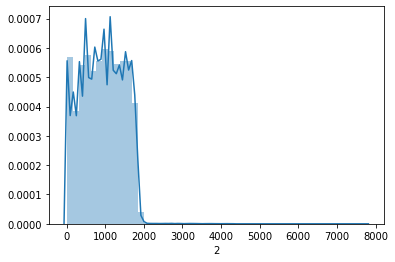

In [247]:
import seaborn as sns
x = np.random.normal(size=30)
print(x)
# sns.distplot(data["AvSigVersion"].values);
sns.distplot(data["AvSigVersion"].str.split(".", expand=True)[2].astype(int))
# sns.distplot(x)

275    3901028
273    3724334
271     269369
269     214502
263     160659
267     138899
251      94182
277      79719
237      70628
261      48790
265      47509
259      36396
257      24257
253      15612
249      14581
247       9753
245       9488
233       9339
235       8826
239       7188
225       5590
255       5029
243       4964
241       4962
231       4692
229       4271
227       3896
223       1862
221        764
199         86
207         73
0           68
213         36
217         19
219         19
215         15
203         13
155         10
197          9
195          8
205          7
193          6
209          6
169          5
201          4
211          3
167          3
177          1
189          1
187          1
Name: 1, dtype: int64

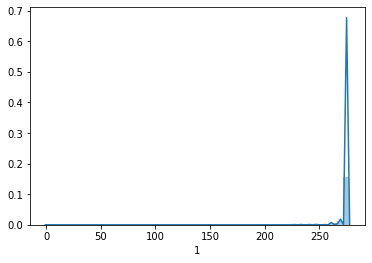

In [260]:
sns.distplot(AvSigVersion_1)
AvSigVersion_1.value_counts()